In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

## Data Loading

Loaded the save data from Feature Engineering

In [2]:
# Load the CSV file into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Relevant_health_data.csv')

# Display the first few rows of the DataFrame
data.head()

,index,Timestamp,Subreddit,Type,Post_id,Title,Author,Text,Score,Total_comments,month,hour,day_of_week,Sentiment,Title_word_count,Text_word_count,Category,Processed_Title,Processed_Text
0,0,2018-05-28 19:41:32,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,Candle1nTh3Dark,"Thank you for posting this, I've failed univer...",141.0,0.0,5,19,Monday,negative,48,20,MH_Improvement,mental health awareness month schizoaffective ...,thank posting failed university 3 time due hos...
1,1,2018-05-28 19:53:47,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,sciencelove1994,I have schizoaffective mixed episode type. I a...,61.0,0.0,5,19,Monday,positive,48,33,MH_Improvement,mental health awareness month schizoaffective ...,schizoaffective mixed episode type junior ivy ...
2,2,2018-05-28 20:04:29,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,Unknown,As someone who is struggling with mental illne...,36.0,0.0,5,20,Monday,negative,48,49,MH_Improvement,mental health awareness month schizoaffective ...,someone struggling mental illness currently co...
3,3,2018-05-28 20:00:07,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,swild89,I’m heading back now at 28! Thanks for the ins...,28.0,0.0,5,20,Monday,positive,48,11,MH_Improvement,mental health awareness month schizoaffective ...,heading back 28 thanks inspiration
4,4,2018-05-28 21:21:11,mentalhealth,Comment,8msp9v,Mental Health Awareness Month: I have schizoaf...,BoozeMeUpScotty,Yayyyy!!! Good for you! This is my favorite ki...,11.0,0.0,5,21,Monday,positive,48,499,MH_Improvement,mental health awareness month schizoaffective ...,yayyyy good favorite kind post see anywhere wo...


> The above data has the preprocessed title, text and category

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838721 entries, 0 to 838720
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             838721 non-null  int64  
 1   Timestamp         838721 non-null  object 
 2   Subreddit         838721 non-null  object 
 3   Type              838721 non-null  object 
 4   Post_id           838721 non-null  object 
 5   Title             838721 non-null  object 
 6   Author            838721 non-null  object 
 7   Text              838721 non-null  object 
 8   Score             838721 non-null  float64
 9   Total_comments    838721 non-null  float64
 10  month             838721 non-null  int64  
 11  hour              838721 non-null  int64  
 12  day_of_week       838721 non-null  object 
 13  Sentiment         838721 non-null  object 
 14  Title_word_count  838721 non-null  int64  
 15  Text_word_count   838721 non-null  int64  
 16  Category          83

In [4]:
data.isnull().sum()

,0
index,0
Timestamp,0
Subreddit,0
Type,0
Post_id,0
Title,0
Author,0
Text,0
Score,0
Total_comments,0


In [5]:
data = data.dropna(subset=['Processed_Title', 'Processed_Text']).reset_index(drop=True)


In [6]:
data.isnull().sum()

,0
index,0
Timestamp,0
Subreddit,0
Type,0
Post_id,0
Title,0
Author,0
Text,0
Score,0
Total_comments,0


## Model Training

> Considered the relevant columns for X and target value for y

In [7]:
relevant_columns = [
    'Subreddit',  'Title_word_count', 'Text_word_count',
    'Score', 'Total_comments','Sentiment' ,'Processed_Title', 'Processed_Text'
]

## Label Encoding and Text vectorization

In [8]:
# Selecting relevant data for X
X = data[relevant_columns]
y = data['Category']

# Text vectorization for 'Processed_Title' and 'Processed_Text'
vectorizer_title = TfidfVectorizer(max_features=1000)
vectorizer_text = TfidfVectorizer(max_features=5000)


# Label encoding for categorical variables
label_encoder = LabelEncoder()
X['Subreddit'] = label_encoder.fit_transform(X['Subreddit'])
X['Sentiment'] = label_encoder.fit_transform(X['Sentiment'])

# Standardizing numerical columns
scaler = StandardScaler()

In [9]:


# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [10]:

# Vectorizing text features for training data
X_train_title_tfidf = vectorizer_title.fit_transform(X_train['Processed_Title'])
X_train_text_tfidf = vectorizer_text.fit_transform(X_train['Processed_Text'])

X_test_title_tfidf = vectorizer_title.transform(X_test['Processed_Title'])
X_test_text_tfidf = vectorizer_text.transform(X_test['Processed_Text'])

# Dropping the original text columns (since they are now vectorized)
X_train = X_train.drop(columns=['Processed_Title', 'Processed_Text'])
X_test = X_test.drop(columns=['Processed_Title', 'Processed_Text'])

In [11]:

# Scaling numerical columns
X_train[['Title_word_count', 'Text_word_count', 'Score', 'Total_comments']] = scaler.fit_transform(
    X_train[['Title_word_count', 'Text_word_count', 'Score', 'Total_comments']]
)
X_test[['Title_word_count', 'Text_word_count', 'Score', 'Total_comments']] = scaler.transform(
    X_test[['Title_word_count', 'Text_word_count', 'Score', 'Total_comments']]
)

In [12]:
# Concatenating vectorized text data with the other features
import scipy
X_train_combined = scipy.sparse.hstack([X_train, X_train_title_tfidf, X_train_text_tfidf])
X_test_combined = scipy.sparse.hstack([X_test, X_test_title_tfidf, X_test_text_tfidf])

In [13]:
import joblib
import os

# Directory to save the models
model_dir = './saved_models'
os.makedirs(model_dir, exist_ok=True)


In [14]:
# Function to save and evaluate model
def train_save_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train_combined, y_train)

    # Save the trained model
    model_path = os.path.join(model_dir, f'{model_name}.joblib')
    joblib.dump(model, model_path)
    print(f"{model_name} saved to {model_path}")

    # Evaluate the model
    y_pred = model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))


## Logistic Regression


In [ ]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
train_save_evaluate_model(logistic_model, 'logistic_regression')



logistic_regression saved to ./saved_models/logistic_regression.joblib
logistic_regression Accuracy: 0.89
Classification Report for logistic_regression:
                 precision    recall  f1-score   support

  MH_Disorders       0.91      0.93      0.92    208770
   MH_Distress       0.82      0.57      0.67     16068
MH_Improvement       0.85      0.85      0.85    103066
         Other       0.84      0.38      0.52      2368

      accuracy                           0.89    330272
     macro avg       0.85      0.68      0.74    330272
  weighted avg       0.88      0.89      0.88    330272



# Random Forest Classifier

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_save_evaluate_model(model=rf_model, model_name='random_forest')


random_forest saved to ./saved_models/random_forest.joblib
random_forest Accuracy: 0.99
Classification Report for random_forest:
                 precision    recall  f1-score   support

  MH_Disorders       0.99      1.00      0.99    208770
   MH_Distress       1.00      0.87      0.93     16068
MH_Improvement       0.99      0.99      0.99    103066
         Other       1.00      0.79      0.88      2368

      accuracy                           0.99    330272
     macro avg       0.99      0.91      0.95    330272
  weighted avg       0.99      0.99      0.99    330272



# Deep Learning Models

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout,Input, Concatenate
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import json
import os


In [16]:
# Parameters
max_vocab_size = 20000
max_sequence_length = 100
embedding_dim = 50

In [17]:
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(data['Processed_Text'].values)
X_text = tokenizer.texts_to_sequences(data['Processed_Text'].values)
X_text = pad_sequences(X_text, maxlen=max_sequence_length)


In [18]:

# Select relevant columns and separate categorical from numerical
relevant_columns = ['Title_word_count', 'Text_word_count', 'Score', 'Total_comments', 'Sentiment']
numerical_columns = ['Title_word_count', 'Text_word_count', 'Score', 'Total_comments']
categorical_columns = ['Sentiment']

# Scale the numerical features
X_numerical = data[numerical_columns]
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X_numerical)

# Encode the categorical features
label_encoder = LabelEncoder()
X_categorical = label_encoder.fit_transform(data['Sentiment'])

# Combine numerical and categorical features
X_additional = np.concatenate([X_numerical, X_categorical.reshape(-1, 1)], axis=1)



In [19]:

# Concatenate text and additional features along the second axis
X_combined = np.concatenate([X_text, X_additional], axis=1)

# Prepare labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Category'].values)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [25]:
from tensorflow.keras.models import Model  # Ensure Model is imported
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input, Concatenate

# Define the inputs for the model
text_input = Input(shape=(max_sequence_length,))
additional_input = Input(shape=(X_additional.shape[1],))

# Text processing layers (embedding and convolution for text data)
embedding_layer = Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length)(text_input)
conv_layer = Conv1D(128, 5, activation='relu')(embedding_layer)
pooling_layer = GlobalMaxPooling1D()(conv_layer)

# Concatenate text and additional inputs
concatenated = Concatenate()([pooling_layer, additional_input])

# Fully connected layers
dense_layer = Dense(64, activation='relu')(concatenated)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(4, activation='softmax')(dropout_layer)  # Multi classification

# Compile the model with appropriate loss function for multi-class classification
model = Model(inputs=[text_input, additional_input], outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Model summary
model.summary()




Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_3 (Embedding)   │ (None, 100, 50)        │      1,000,000 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 96, 128)        │         32,128 │ embedding_3[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_3    │ (None, 128)            │              0 │ conv1d_3[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_7             │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 133)            │              0 │ global_max_pooling1d_… │
│ (Concatenate)             │                        │                │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 64)             │          8,576 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 64)             │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 4)              │            260 │ dropout_3[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,040,964 (3.97 MB)

 Trainable params: 1,040,964 (3.97 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Set up checkpointing to save model weights
checkpoint_dir = './checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "model-{epoch:02d}-{val_accuracy:.2f}.weights.h5")
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      save_best_only=True,
                                      monitor='val_accuracy',
                                      mode='max',
                                      verbose=1)

# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Train the model and save history
history = model.fit(
    [X_train[:, :max_sequence_length], X_train[:, max_sequence_length:]],  # Adjust input data as needed
    y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=32,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

# Save training history
history_path = 'training_history.json'
with open(history_path, 'w') as f:
    json.dump(history.history, f)

print(f"Training history saved to {history_path}")



Epoch 1/10
16512/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6856 - loss: 0.7185
Epoch 1: val_accuracy improved from -inf to 0.71830, saving model to ./checkpoints/model-01-0.72.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 480s 29ms/step - accuracy: 0.6856 - loss: 0.7185 - val_accuracy: 0.7183 - val_loss: 0.6398
Epoch 2/10
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7309 - loss: 0.6228
Epoch 2: val_accuracy improved from 0.71830 to 0.72341, saving model to ./checkpoints/model-02-0.72.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 496s 29ms/step - accuracy: 0.7309 - loss: 0.6228 - val_accuracy: 0.7234 - val_loss: 0.6328
Epoch 3/10
16512/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7493 - loss: 0.5841
Epoch 3: val_accuracy did not improve from 0.72341
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 487s 28ms/step - accuracy: 0.7493 - loss: 0.5841 - val_accuracy: 0.7191 - val_loss: 0.6438
Epoch 4/10
16513/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7714 - loss: 0

In [27]:
# # Reload model from checkpoint
# latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
# if latest_checkpoint:
#     model.load_weights(latest_checkpoint)
#     print(f"Loaded model from {latest_checkpoint}")

# # Continue training if needed
# model.fit(
#     X_train, y_train,
#     epochs=5,  # Add more epochs as needed
#     validation_split=0.2,
#     batch_size=32
# )

# Load and plot training history
with open(history_path, 'r') as f:
    saved_history = json.load(f)



In [28]:
# Split X_test into text and additional features
X_test_text = X_test[:, :max_sequence_length]           # Text input
X_test_additional = X_test[:, max_sequence_length:]     # Additional features input

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_test_text, X_test_additional], y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


5161/5161 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.7067 - loss: 0.7008
Test Accuracy: 0.71


In [29]:
# Print saved history or plot (if you want to visualize training progress)
print("Training and Validation Accuracy:", saved_history.get('accuracy'), saved_history.get('val_accuracy'))


Training and Validation Accuracy: [0.7027013897895813, 0.7294028401374817, 0.7472650408744812, 0.7675684094429016, 0.7870391011238098] [0.7183008193969727, 0.7234101891517639, 0.7191258668899536, 0.7147582769393921, 0.7063031196594238]


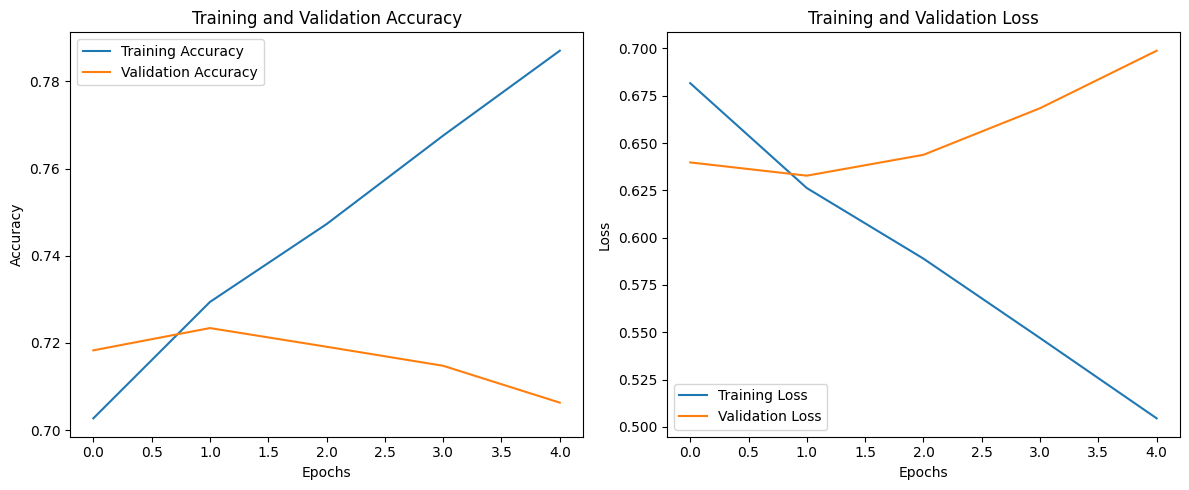

In [39]:
import json
import matplotlib.pyplot as plt

# Load training history
history_path = 'training_history.json'
with open(history_path, 'r') as f:
    saved_history = json.load(f)

# Extract accuracy and loss data
train_accuracy = saved_history.get('accuracy', [])
val_accuracy = saved_history.get('val_accuracy', [])
train_loss = saved_history.get('loss', [])
val_loss = saved_history.get('val_loss', [])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()




The training accuracy shows a steady upward trend, indicating that the model is learning and fitting the training data well.
The training loss consistently decreases across epochs, suggesting that the model is minimizing the error on the training data effectively.

The validation accuracy initially increases slightly but then starts to decrease. This trend indicates that the model might be overfitting to the training data after the first few epochs.
The validation loss shows a concave pattern: it initially decreases, indicating some generalization, but then it starts increasing, which is a classic sign of overfitting.


In [30]:
# Set up checkpointing to save model weights
checkpoint_dir = './checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "model1-50-{epoch:02d}-{val_accuracy:.2f}.weights.h5")  # Changed extension to .weights.h5
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      save_best_only=True,
                                      monitor='val_accuracy',
                                      mode='max',
                                      verbose=1)

# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Train the model and save history
history = model.fit(
    [X_train[:, :max_sequence_length], X_train[:, max_sequence_length:]],  # Adjust input data as needed
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

# Save training history
history_path = 'training_history50.json'
with open(history_path, 'w') as f:
    json.dump(history.history, f)

print(f"Training history saved to {history_path}")


Epoch 1/50
16513/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8108 - loss: 0.4509
Epoch 1: val_accuracy improved from -inf to 0.70568, saving model to ./checkpoints/model1-50-01-0.71.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 435s 26ms/step - accuracy: 0.8108 - loss: 0.4509 - val_accuracy: 0.7057 - val_loss: 0.7616
Epoch 2/50
16513/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8258 - loss: 0.4161
Epoch 2: val_accuracy did not improve from 0.70568
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 443s 26ms/step - accuracy: 0.8258 - loss: 0.4161 - val_accuracy: 0.7007 - val_loss: 0.8101
Epoch 3/50
16512/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8379 - loss: 0.3881
Epoch 3: val_accuracy did not improve from 0.70568
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 438s 27ms/step - accuracy: 0.8379 - loss: 0.3881 - val_accuracy: 0.6925 - val_loss: 0.8915
Epoch 4/50
16512/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8468 - loss: 0.3658
Epoch 4: val_accuracy did not improve from 0.70568

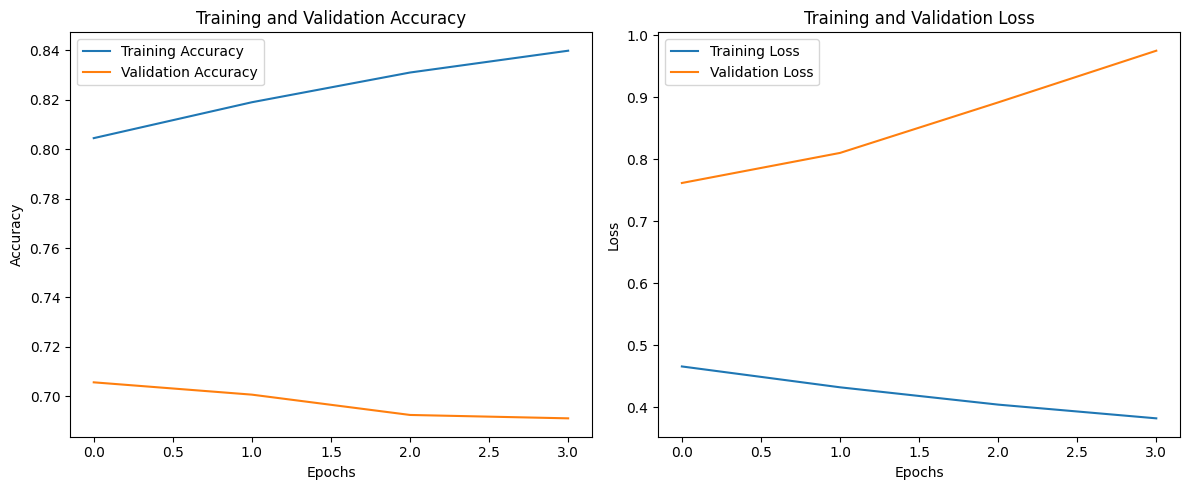

In [40]:
import json
import matplotlib.pyplot as plt

# Load training history
history_path = 'training_history50.json'
with open(history_path, 'r') as f:
    saved_history = json.load(f)

# Extract accuracy and loss data
train_accuracy = saved_history.get('accuracy', [])
val_accuracy = saved_history.get('val_accuracy', [])
train_loss = saved_history.get('loss', [])
val_loss = saved_history.get('val_loss', [])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()



Training accuracy is steadily increasing -- the model is learning well on the training data.
Training loss is steadily decreasing, which is consistent with improved learning.

Validation accuracy is slowly decreasing, shows that the model's performance on unseen data is worsening slightly with each epoch.
Validation loss is increasing steadily, which is a clear sign of overfitting.


Analysis
The model starts to overfit from the very first few epochs, as seen by the divergence between training and validation metrics. The training accuracy improves, but the validation accuracy declines, and the validation loss increases, indicating a lack of generalization.



In [31]:
# Load and plot training history
with open(history_path, 'r') as f:
    saved_history = json.load(f)

In [32]:
# Split X_test into text and additional features
X_test_text = X_test[:, :max_sequence_length]           # Text input
X_test_additional = X_test[:, max_sequence_length:]     # Additional features input

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_test_text, X_test_additional], y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

5161/5161 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.6889 - loss: 0.9749
Test Accuracy: 0.69


In [33]:
# Print saved history or plot (if you want to visualize training progress)
print("Training and Validation Accuracy:", saved_history.get('accuracy'), saved_history.get('val_accuracy'))


Training and Validation Accuracy: [0.8044357299804688, 0.818952202796936, 0.8309707045555115, 0.8397892117500305] [0.7056824564933777, 0.7007017135620117, 0.6924887895584106, 0.6911187171936035]


In [34]:
from tensorflow.keras.layers import Concatenate, Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.models import Model

# Define inputs for text and additional features
text_input = Input(shape=(max_sequence_length,), name="text_input")
additional_input = Input(shape=(X_additional.shape[1],), name="additional_input")

# Embedding layer
embedding_layer = Embedding(input_dim=max_vocab_size, output_dim=embedding_dim, input_length=max_sequence_length)(text_input)

# Multiple Conv1D layers with different filter sizes (Kim's model)
conv_3 = Conv1D(128, 3, activation='relu')(embedding_layer)
conv_4 = Conv1D(128, 4, activation='relu')(embedding_layer)
conv_5 = Conv1D(128, 5, activation='relu')(embedding_layer)

# Global Max Pooling for each convolution layer
pool_3 = GlobalMaxPooling1D()(conv_3)
pool_4 = GlobalMaxPooling1D()(conv_4)
pool_5 = GlobalMaxPooling1D()(conv_5)

# Concatenate all pooled features
concatenated = Concatenate()([pool_3, pool_4, pool_5, additional_input])

# Fully connected layers
dense_layer = Dense(64, activation='relu')(concatenated)
dropout_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(4, activation='softmax')(dropout_layer)  # Multi-class classification (4 classes)

# Compile the model with appropriate loss for multi-class classification
model_kim = Model(inputs=[text_input, additional_input], outputs=output_layer)
model_kim.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_kim.summary()




Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)   │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, 100, 50)        │      1,000,000 │ text_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 98, 128)        │         19,328 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 97, 128)        │         25,728 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_6 (Conv1D)         │ (None, 96, 128)        │         32,128 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_4    │ (None, 128)            │              0 │ conv1d_4[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_5    │ (None, 128)            │              0 │ conv1d_5[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_max_pooling1d_6    │ (None, 128)            │              0 │ conv1d_6[0][0]         │
│ (GlobalMaxPooling1D)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ additional_input          │ (None, 5)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 389)            │              0 │ global_max_pooling1d_… │
│ (Concatenate)             │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ global_max_pooling1d_… │
│                           │                        │                │ additional_input[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 64)             │         24,960 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 64)             │              0 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 4)              │            260 │ dropout_4[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,102,404 (4.21 MB)

 Trainable params: 1,102,404 (4.21 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Split X_train and X_test into separate inputs for training and testing
X_train_text = X_train[:, :max_sequence_length]           # Text input
X_train_additional = X_train[:, max_sequence_length:]     # Additional features input

# Set up checkpointing and early stopping
checkpoint_dir = './checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, "modelkim-{epoch:02d}-{val_accuracy:.2f}.weights.h5")
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history_kim = model_kim.fit(
    [X_train_text, X_train_additional],  # Provided text and additional inputs separately
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

# Save the training history
history_path = 'kim_cnn_history.json'
with open(history_path, 'w') as f:
    json.dump(history_kim.history, f)
print(f"Training history saved to {history_path}")

# Prepare test data for evaluation
X_test_text = X_test[:, :max_sequence_length]
X_test_additional = X_test[:, max_sequence_length:]

# Evaluate the model on test data
test_loss, test_accuracy = model_kim.evaluate([X_test_text, X_test_additional], y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")



Epoch 1/50
16513/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6870 - loss: 0.7209
Epoch 1: val_accuracy improved from -inf to 0.71801, saving model to ./checkpoints/modelkim-01-0.72.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 847s 51ms/step - accuracy: 0.6870 - loss: 0.7209 - val_accuracy: 0.7180 - val_loss: 0.6434
Epoch 2/50
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7291 - loss: 0.6287
Epoch 2: val_accuracy improved from 0.71801 to 0.72199, saving model to ./checkpoints/modelkim-02-0.72.weights.h5
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 881s 52ms/step - accuracy: 0.7291 - loss: 0.6287 - val_accuracy: 0.7220 - val_loss: 0.6360
Epoch 3/50
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7504 - loss: 0.5871
Epoch 3: val_accuracy did not improve from 0.72199
16514/16514 ━━━━━━━━━━━━━━━━━━━━ 903s 51ms/step - accuracy: 0.7504 - loss: 0.5871 - val_accuracy: 0.7198 - val_loss: 0.6446
Epoch 4/50
16513/16514 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7736 - l

In [36]:
# Load and plot training history
with open(history_path, 'r') as f:
    saved_history = json.load(f)

In [37]:
# Print saved history or plot (if you want to visualize training progress)
print("Training and Validation Accuracy:", saved_history.get('accuracy'), saved_history.get('val_accuracy'))

Training and Validation Accuracy: [0.7015413641929626, 0.7283241748809814, 0.7475072741508484, 0.7679487466812134, 0.7874345779418945] [0.7180055975914001, 0.7219871282577515, 0.7198222875595093, 0.7145614624023438, 0.7073855400085449]


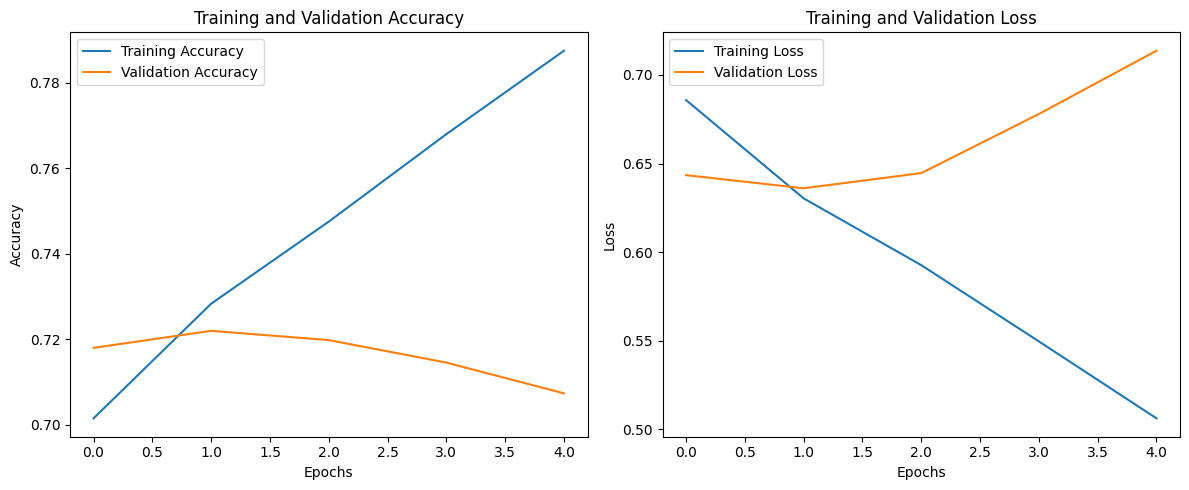

In [41]:
import json
import matplotlib.pyplot as plt

# Load training history
history_path = 'kim_cnn_history.json'
with open(history_path, 'r') as f:
    saved_history = json.load(f)

# Extract accuracy and loss data
train_accuracy = saved_history.get('accuracy', [])
val_accuracy = saved_history.get('val_accuracy', [])
train_loss = saved_history.get('loss', [])
val_loss = saved_history.get('val_loss', [])

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()



Training accuracy continues to increase with each epoch, reaching around 78%.
Training loss steadily decreases, which indicates that the model is fitting well to the training data.


Validation accuracy initially improves but then declines, showing a sign of overfitting from around the second epoch onward.
Validation loss decreases slightly initially but then starts to increase, confirming that the model is overfitting after a few epochs.

